In [1]:
%matplotlib inline
from caffe.proto import caffe_pb2
from caffe2.proto import caffe2_pb2
from cStringIO import StringIO
from google.protobuf import text_format
from IPython import display
import matplotlib.image as mpimg
from matplotlib import pyplot
import numpy as np
import os
from caffe2.python import caffe_translator, visualize, workspace, net_drawer
import skimage
import skimage.io
import skimage.transform
import sys

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# This should point to the root folder of Caffe that you checked
# out from https://github.com/BVLC/caffe
# You can do it by
#     git clone https://github.com/BVLC/caffe.git
CAFFE_ROOT = '/Users/jiayq/Research/caffe'
#MODEL = 'bvlc_reference_caffenet'
MODEL = 'bvlc_googlenet'

CAFFE_MODEL_FILE = os.path.join(
    CAFFE_ROOT, 'models', MODEL, 'deploy.prototxt')
CAFFE_PRETRAINED = os.path.join(
    CAFFE_ROOT, 'models', MODEL, MODEL + '.caffemodel')
if not os.path.exists(CAFFE_MODEL_FILE):
    os.system(
        os.path.join(CAFFE_ROOT, 'scripts/download_model_binary.py') +
        ' ' +
        os.path.join(CAFFE_ROOT, 'models', MODEL))
    os.system(os.path.join(CAFFE_ROOT, 'data/ilsvrc12/get_ilsvrc_aux.sh'))

IMAGE_FILE = 'images/cat.jpg'
print('Loading models...')
caffenet = caffe_pb2.NetParameter()
caffenet_pretrained = caffe_pb2.NetParameter()
text_format.Merge(open(CAFFE_MODEL_FILE).read(), caffenet)
caffenet_pretrained.ParseFromString(open(CAFFE_PRETRAINED).read())
print('Model loaded.')

Loading models...
Model loaded.


In [3]:
# Perform translation, using the caffenet and pretrained parameters.
print 'Translating model.'
net, pretrained_params = caffe_translator.TranslateModel(
    caffenet, caffenet_pretrained, is_test=True)

Translating model.
Translate layer data
Translate layer conv1/7x7_s2
Translate layer conv1/relu_7x7
Translate layer pool1/3x3_s2
Translate layer pool1/norm1
Translate layer conv2/3x3_reduce
Translate layer conv2/relu_3x3_reduce
Translate layer conv2/3x3
Translate layer conv2/relu_3x3
Translate layer conv2/norm2
Translate layer pool2/3x3_s2
Translate layer inception_3a/1x1
Translate layer inception_3a/relu_1x1
Translate layer inception_3a/3x3_reduce
Translate layer inception_3a/relu_3x3_reduce
Translate layer inception_3a/3x3
Translate layer inception_3a/relu_3x3
Translate layer inception_3a/5x5_reduce
Translate layer inception_3a/relu_5x5_reduce
Translate layer inception_3a/5x5
Translate layer inception_3a/relu_5x5
Translate layer inception_3a/pool
Translate layer inception_3a/pool_proj
Translate layer inception_3a/relu_pool_proj
Translate layer inception_3a/output
Translate layer inception_3b/1x1
Translate layer inception_3b/relu_1x1
Translate layer inception_3b/3x3_reduce
Translate l

GoogleNet


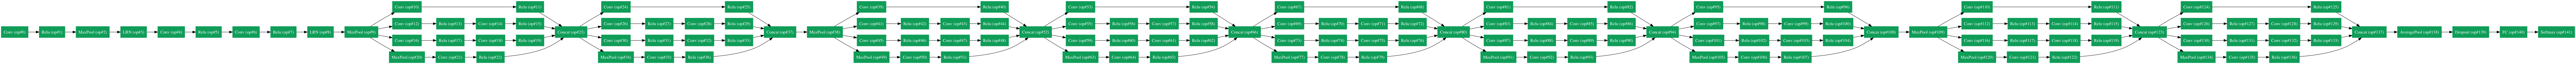

In [4]:
graph = net_drawer.GetPydotGraphMinimal(net.op, net.name, rankdir="LR")
print net.name
display.Image(graph.create_png(), width=800)
# The above command shows only the operators. If you want to see both the
# operators and the blobs, use the command below.
#graph = net_drawer.GetPydotGraph(net.operators, net.name, rankdir="BT")
#display.Image(graph.create_png(), width=500)

In [5]:
for tensor in pretrained_params.protos:
    print tensor.name

conv1/7x7_s2_w
conv1/7x7_s2_b
conv2/3x3_reduce_w
conv2/3x3_reduce_b
conv2/3x3_w
conv2/3x3_b
inception_3a/1x1_w
inception_3a/1x1_b
inception_3a/3x3_reduce_w
inception_3a/3x3_reduce_b
inception_3a/3x3_w
inception_3a/3x3_b
inception_3a/5x5_reduce_w
inception_3a/5x5_reduce_b
inception_3a/5x5_w
inception_3a/5x5_b
inception_3a/pool_proj_w
inception_3a/pool_proj_b
inception_3b/1x1_w
inception_3b/1x1_b
inception_3b/3x3_reduce_w
inception_3b/3x3_reduce_b
inception_3b/3x3_w
inception_3b/3x3_b
inception_3b/5x5_reduce_w
inception_3b/5x5_reduce_b
inception_3b/5x5_w
inception_3b/5x5_b
inception_3b/pool_proj_w
inception_3b/pool_proj_b
inception_4a/1x1_w
inception_4a/1x1_b
inception_4a/3x3_reduce_w
inception_4a/3x3_reduce_b
inception_4a/3x3_w
inception_4a/3x3_b
inception_4a/5x5_reduce_w
inception_4a/5x5_reduce_b
inception_4a/5x5_w
inception_4a/5x5_b
inception_4a/pool_proj_w
inception_4a/pool_proj_b
inception_4b/1x1_w
inception_4b/1x1_b
inception_4b/3x3_reduce_w
inception_4b/3x3_reduce_b
inception_4b/3

In [6]:
# We will first specify the device option: how we want to run the network.
net.device_option.device_type = caffe2_pb2.CPU
# If you want to use cuda, use the following commands
#net.device_option.device_type = caffe2_pb2.CUDA
#net.device_option.cuda_gpu_id = 0

# pycaffe2.workspace implements a very simple Model object that wraps the construction
# of the model. Specifically, what it did was:
# (1) feed the parameters to the workspace;
# (2) Create input blob placeholders;
# (3) Actually instantiating the Caffe network.
# Here we will simply use the Model object to host the model.

model = workspace.Model(net, pretrained_params, ["data"], ["prob"])
print 'Network created sucessfully.'

Feeding parameter conv1/7x7_s2_w
Feeding parameter conv1/7x7_s2_b
Feeding parameter conv2/3x3_reduce_w
Feeding parameter conv2/3x3_reduce_b
Feeding parameter conv2/3x3_w
Feeding parameter conv2/3x3_b
Feeding parameter inception_3a/1x1_w
Feeding parameter inception_3a/1x1_b
Feeding parameter inception_3a/3x3_reduce_w
Feeding parameter inception_3a/3x3_reduce_b
Feeding parameter inception_3a/3x3_w
Feeding parameter inception_3a/3x3_b
Feeding parameter inception_3a/5x5_reduce_w
Feeding parameter inception_3a/5x5_reduce_b
Feeding parameter inception_3a/5x5_w
Feeding parameter inception_3a/5x5_b
Feeding parameter inception_3a/pool_proj_w
Feeding parameter inception_3a/pool_proj_b
Feeding parameter inception_3b/1x1_w
Feeding parameter inception_3b/1x1_b
Feeding parameter inception_3b/3x3_reduce_w
Feeding parameter inception_3b/3x3_reduce_b
Feeding parameter inception_3b/3x3_w
Feeding parameter inception_3b/3x3_b
Feeding parameter inception_3b/5x5_reduce_w
Feeding parameter inception_3b/5x5_r

Input shape is 224x224
Final input shape is: (1, 3, 224, 224)


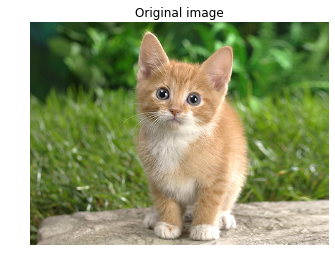

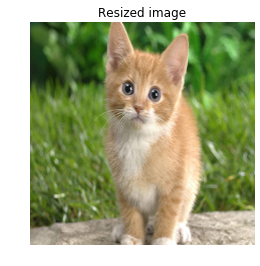

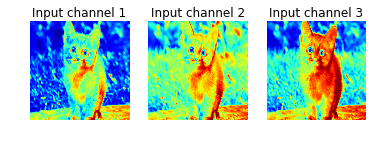

In [7]:
IMAGE_FILE = 'images/cat.jpg'
img = skimage.img_as_float(skimage.io.imread(IMAGE_FILE)).astype(np.float32)
pyplot.imshow(img)
pyplot.axis('off')
pyplot.title('Original image')
# Here are the steps we use to preprocess the image.
# (1) Resize the image to 256*256, and crop out the center.
input_height, input_width = 224, 224
print 'Input shape is %dx%d' % (input_height, input_width)
img = skimage.transform.resize(img, (256, 256))
crop_height = (256 - input_height) / 2
crop_width = (256 - input_width) / 2
img = img[crop_height:crop_height + input_height, 
          crop_width:crop_width + input_width]
pyplot.figure()
pyplot.imshow(img)
pyplot.axis('off')
pyplot.title('Resized image')
# (2) Since Caffe expects CHW order and the current image is HWC,
#     we will need to change the order.
img = img.swapaxes(1, 2).swapaxes(0, 1)
# (3) Caffe uses a BGR order due to legacy OpenCV issues, so we
#     will change RGB to BGR.
img = img[(2, 1, 0), :, :]
# (4) We will subtract the mean image. Note that skimage loads
#     image in the [0, 1] range so we multiply the pixel values
#     first to get them into [0, 255].
mean_file = os.path.join(CAFFE_ROOT, 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mean = np.load(mean_file).mean(1).mean(1)
img = img * 255 - mean[:, np.newaxis, np.newaxis]
pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(img[i])
    pyplot.axis('off')
    pyplot.title('Input channel %d' % (i+1))
# (5) finally, since caffe2 expect the input to have a batch term
#     so we can feed in multiple images, we will simply prepend a
#     batch dimension of size 1. Also, we will make sure image is
#     of type np.float32.
img = img[np.newaxis, :, :, :].astype(np.float32)
print 'Final input shape is:', img.shape

Max prediction is: 282


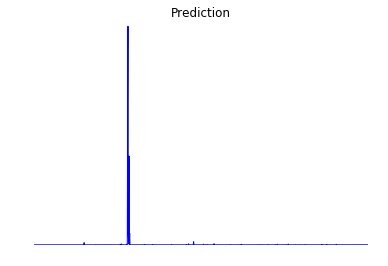

In [8]:
results = model.Run([img])
prob = workspace.FetchBlob('prob').flatten()
pyplot.plot(prob)
pyplot.title('Prediction')
pyplot.axis('off')
print 'Max prediction is:', prob.argmax()